## Goal:
This computes the analytic Fourier Series for any function periodic over domain [0, L]

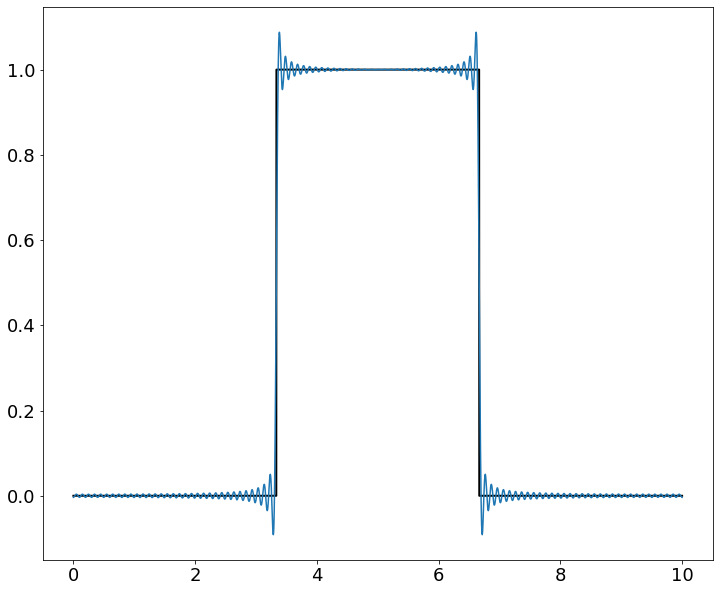

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

# Define domain
dx = 0.001
L = 10
x = np.arange(0, L, dx)
n = len(x)
nthird = int(np.floor(n/3))

# Define function
f = np.zeros_like(x)
for i in range(len(f)):
    if i>nthird and i<2*nthird:
        f[i] = 1

fig, ax = plt.subplots()
ax.plot(x, f, '-', color='k', LineWidth=2)
ax.set_aspect(7)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)
A0 = (2/L)*np.sum(f)*dx
fFS = A0/2

num_sums = 101
A = np.zeros(num_sums)
B = np.zeros(num_sums)

print_every = 100
for k in range(num_sums):
    A[k] = (2/L)*np.sum(f*np.cos(2*np.pi*(k+1)*x/L))*dx
    B[k] = (2/L)*np.sum(f*np.sin(2*np.pi*(k+1)*x/L))*dx
    fFS = fFS + A[k]*np.cos(2*(k+1)*np.pi*x/L) + B[k]*np.sin(2*(k+1)*np.pi*x/L)
    if (k+1) % print_every == 0:
        ax.plot(x,fFS,'-')
# ax.plot(x,fFS,'-')

## Takeaway:
Here we can see that the truncated Fourier series can accurately approximate continuous functions. However, at discontinuities, we see Gibbs phenomena. If the series was truly infinite, Gibbs phenomena would disappear

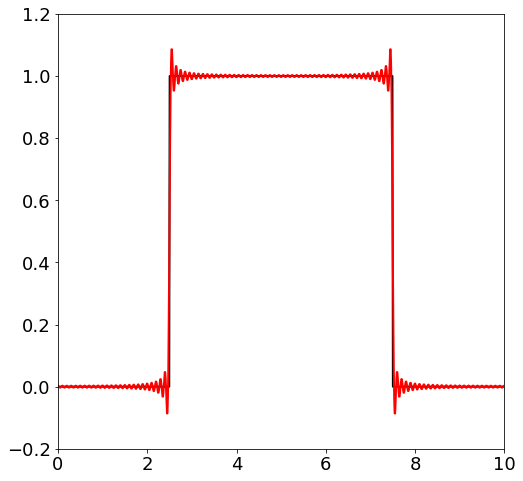

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'


dx = 0.01
L = 10
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

fig,ax = plt.subplots()
plt.plot(x,f,color='k',LineWidth=2)
fFS_plot, = plt.plot([],[],color='r',LineWidth=2)

all_fFS = np.zeros((len(fFS),101))
all_fFS[:,0] = fFS

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFS[:,k] = fFS

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFS

def animate(iter):
    fFS_plot.set_data(x,all_fFS[:,iter])
    return fFS_plot

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=101,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())